1. Import the module and check the version

In [4]:
import pandas as pd
import numpy as np

pd.__version__, np.__version__

('1.4.3', '1.23.2')

2. Create a pandas Series object from a sheet, a NumPy object, and a dictionary

In [8]:
src_list = list('abcde')
src_arr = np.arange(5)
src_dict = dict(zip(src_list, src_arr))

pd.Series(src_list), pd.Series(src_arr), pd.Series(src_dict)

(0    a
 1    b
 2    c
 3    d
 4    e
 dtype: object,
 0    0
 1    1
 2    2
 3    3
 4    4
 dtype: int64,
 a    0
 b    1
 c    2
 d    3
 e    4
 dtype: int64)

3. Convert a Seris object into a DataFrame

In [14]:
s = pd.Series({'a': 'one', 'b': 'two', 'c': 'three'})

pd.DataFrame(s)

,0
a,one
b,two
c,three


In [15]:
s.to_frame()

,0
a,one
b,two
c,three


4. How to combine multiple Series objects in a Dataframe

In [21]:
s1 = pd.Series(list('abcdefghij'))
s2 = pd.Series(np.arange(10))

pd.concat([s1, s2], axis=1)

,0,1
0,a,0
1,b,1
2,c,2
3,d,3
4,e,4
5,f,5
6,g,6
7,h,7
8,i,8
9,j,9


In [23]:
pd.DataFrame({'col1': s1, 'col2': s2})

,col1,col2
0,a,0
1,b,1
2,c,2
3,d,3
4,e,4
5,f,5
6,g,6
7,h,7
8,i,8
9,j,9


5. Assign a name to the Series object index

In [28]:
s1.name = 'new_series'
s1

0    a
1    b
2    c
3    d
4    e
5    f
6    g
7    h
8    i
9    j
Name: new_series, dtype: object

6. Get elements of a Series A object that are not in a Series B object

In [30]:
s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([4, 5, 6, 7, 8])

ans = s1[~s1.isin(s2)]
ans

0    1
1    2
2    3
dtype: int64

In [31]:
ans2 = np.setdiff1d(s1, s2, assume_unique=False)
ans2

array([1, 2, 3])

7. Get non-overlapping elements in two Series objects

In [32]:
s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([4, 5, 6, 7, 8])

s_union = pd.Series(np.union1d(s1, s2))

s_intersect = pd.Series(np.intersect1d(s1, s2))

ans = s_union[~s_union.isin(s_intersect)]
 

ans2 = np.setxor1d(s1, s2, assume_unique=False)
 
print(ans)

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64


In [33]:
ans2

array([1, 2, 3, 6, 7, 8])

8. Obtain descriptive statistics indicators from the Series facility

In [34]:
state = np.random.RandomState(42)
 
s = pd.Series(state.normal(10, 5, 25))
pkz = s.describe()
print(pkz)

count    25.000000
mean      9.182460
std       4.782765
min       0.433599
25%       7.188562
50%       8.829315
75%      12.483571
max      17.896064
dtype: float64


9. To find out the frequency of unique elements of a Series object (histogram)

b    9
e    4
f    3
k    3
i    3
a    3
g    2
c    1
h    1
d    1
dtype: int64


<AxesSubplot:>

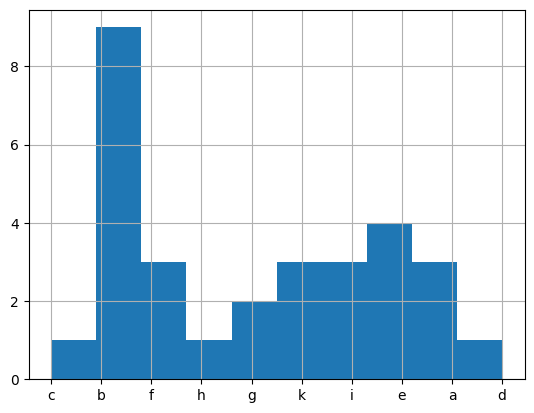

In [47]:
data = 'abcdefghik'
len_series = 30
s = pd.Series(np.take(list(data), np.random.randint(len(data), size=len_series)))

ans = s.value_counts()
 
print(ans)
s.hist()

10. Replace all elements of the Series object with "Other" except the two most common

In [48]:
s[~s.isin(s.value_counts().index[:2])] = 'Other'
s

0     Other
1         b
2     Other
3     Other
4     Other
5         b
6         b
7     Other
8     Other
9         b
10        e
11        e
12    Other
13        b
14    Other
15    Other
16    Other
17    Other
18    Other
19        b
20        b
21    Other
22    Other
23        e
24        b
25        e
26    Other
27    Other
28        b
29    Other
dtype: object